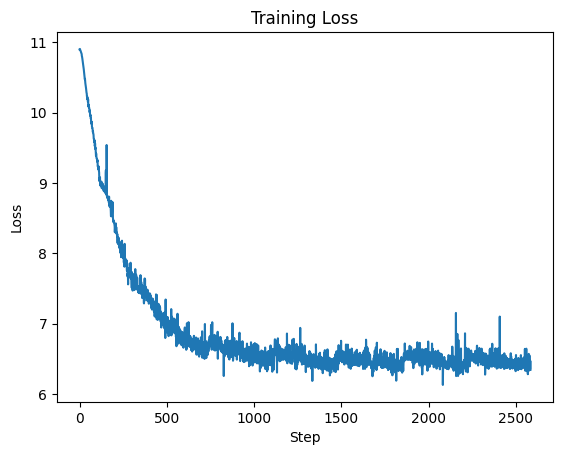

In [73]:
#after mlp only script 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log4.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

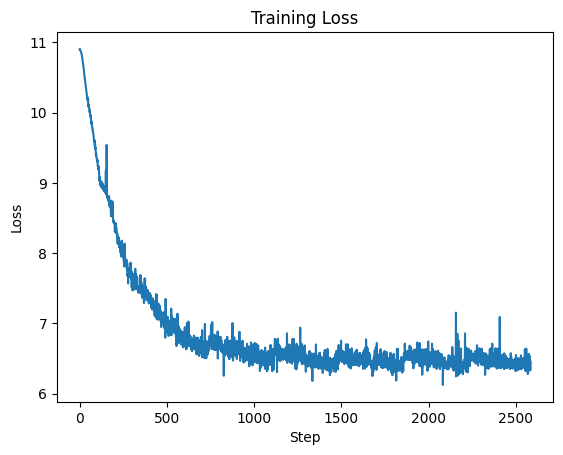

In [79]:
# after process group changes
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log5.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

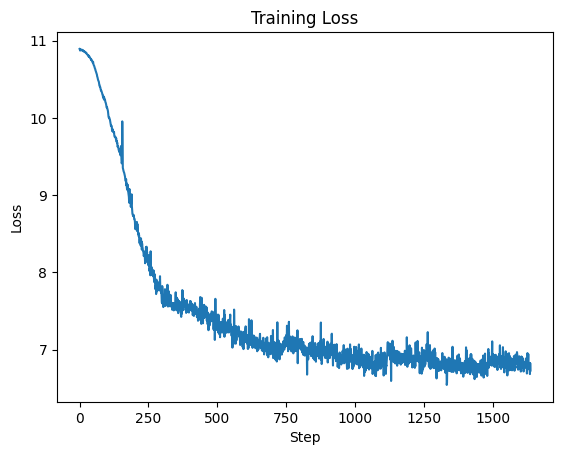

In [791]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log7.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

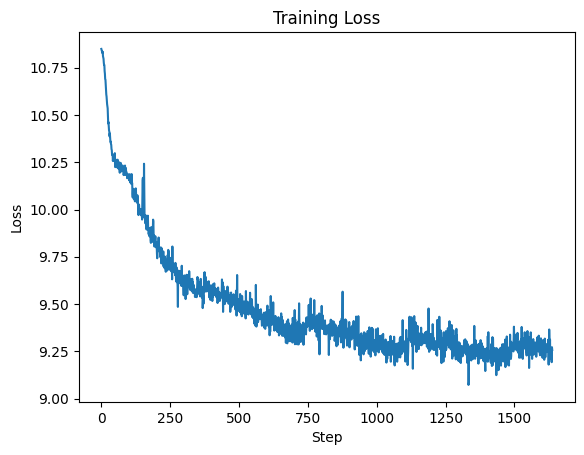

In [793]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log87.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

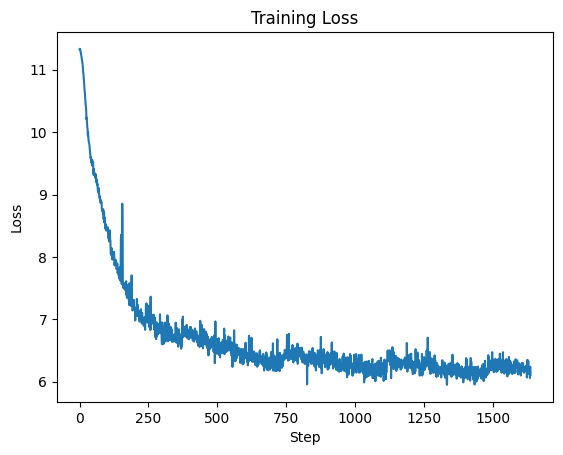

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log102.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

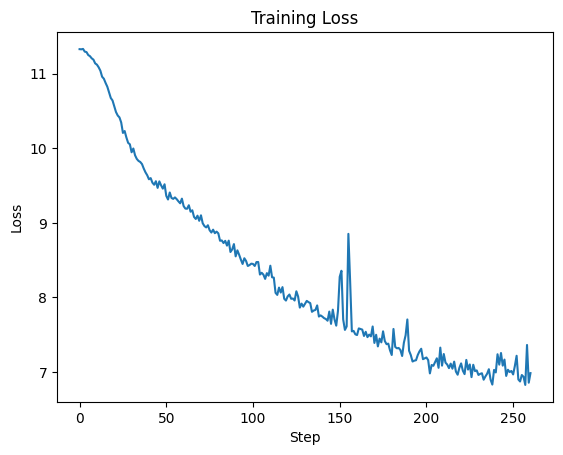

In [320]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

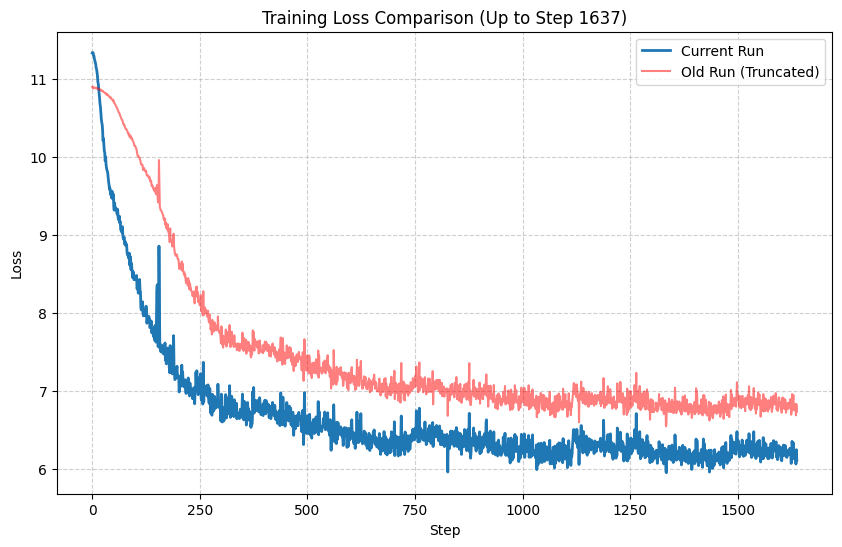

Avg. Throughput new: 46040.69915543711
Min Train Loss new: 5.948166
Min Val Loss new: 6.223662
Avg. Throughput old: 37349.7465271044
Min Train Loss old: 6.544059
Min Val Loss old: 6.837506


In [454]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_log7.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "-", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())

print("Avg. Throughput old:",df_old['tok_per_sec'].mean())
print("Min Train Loss old:",df_old['loss'][:].min())
print("Min Val Loss old:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())

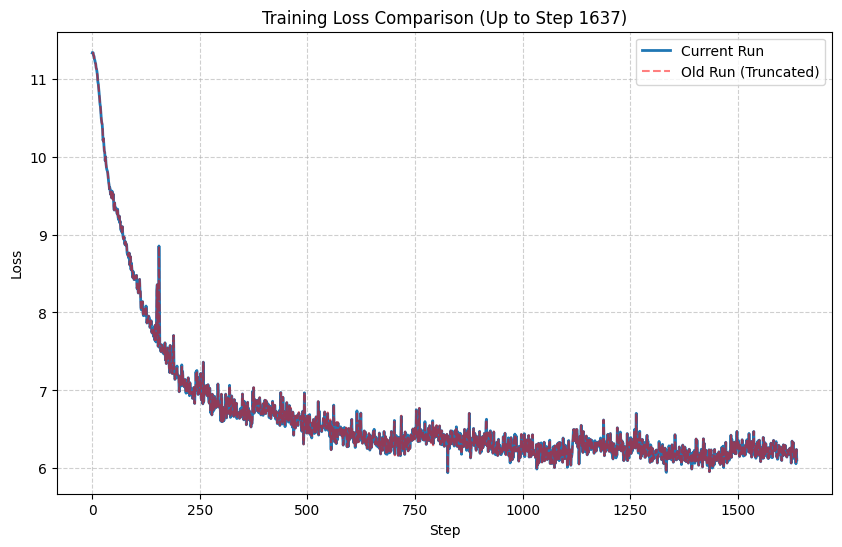

Avg. Throughput new: 47549.14508454212
Min Train Loss new: 5.944341
Min Val Loss new: 6.223601
Avg. Time new: 1383.7652628797314
Avg. Data Time new: 0.16476338949938948
Avg. Forward Time new: 383.7659928943834
Avg. Loss Time new: 40.26491115506715
Avg. Backward Time new: 908.4813858217339
Avg. clip_grad Time new: 37.23170529059829
Avg. Optimizer Time new: 1.8796896312576312
Avg. Tok_Emb Time new: 0.926390525030525
Avg. Pos_Emb Time new: 0.1524711697191697
Avg. Mlp Time new: 137.3948575805861
Avg. Ln_f Time new: 1.4874302124542125
Avg. LM Head Time new: 252.3491538162393

Avg. Throughput old: 46040.69915543711
Min Train Loss old: 5.948166
Min Val Loss old: 6.223662
Avg. Time old: 1430.0046136202686
Avg. Data Time old: 0.22151841758241758
Avg. Forward Time old: 387.23634951343104
Avg. Loss Time old: 40.26637118192917
Avg. Backward Time old: 919.6310023186812
Avg. clip_grad Time old: 37.22742807875458
Avg. Optimizer Time old: 33.345595455433454
Avg. Tok_Emb Time old: 0.9264759365079365
Av

In [89]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log2.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old['tok_per_sec'].mean())
print("Min Train Loss old:",df_old['loss'][:].min())
print("Min Val Loss old:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old['dt_ms'].mean())
print("Avg. Data Time old:",df_old['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old['timer_lm_head'][:].mean())

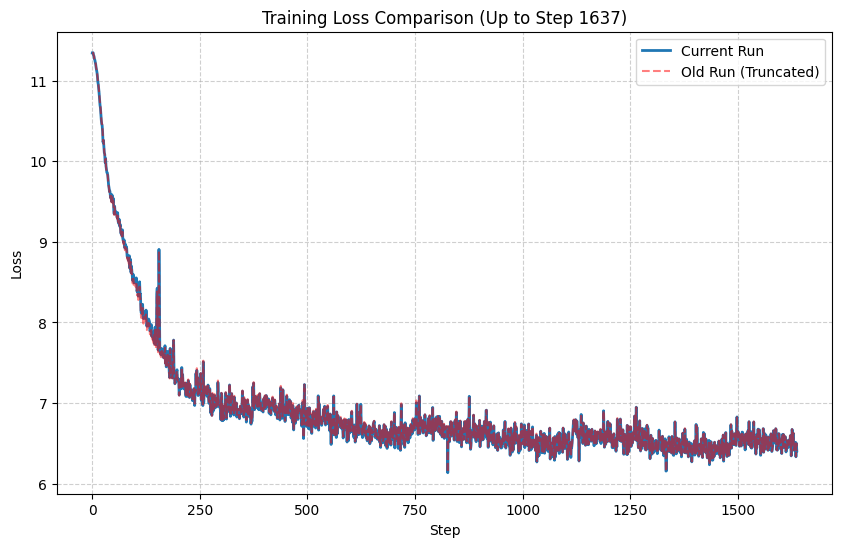

Avg. Throughput new: 41997.2816882674
Min Train Loss new: 6.135421
Min Val Loss new: 6.521286
Avg. Time new: 1567.2566368931623
Avg. Data Time new: 0.22236413186813186
Avg. Forward Time new: 474.00124583577536
Avg. Loss Time new: 40.26086446398046
Avg. Backward Time new: 985.9079653260075
Avg. clip_grad Time new: 37.387936230769235
Avg. Optimizer Time new: 14.999595526251525
Avg. Tok_Emb Time new: 4.070879238095238
Avg. Pos_Emb Time new: 0.1828453431013431
Avg. Mlp Time new: 226.890449958486
Avg. Ln_f Time new: 1.4875822222222221
Avg. LM Head Time new: 252.4064803956044

Avg. Throughput old: 47001.55144662698
Min Train Loss old: 6.139346
Min Val Loss old: 6.522188
Avg. Time old: 1399.7660452264954
Avg. Data Time old: 0.30258803418803415
Avg. Forward Time old: 387.55176482112336
Avg. Loss Time old: 40.24709984004884
Avg. Backward Time old: 907.3955748369963
Avg. clip_grad Time old: 37.232308153846155
Avg. Optimizer Time old: 14.99206396092796
Avg. Tok_Emb Time old: 4.071269137973138
Avg

In [145]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log14.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log19.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

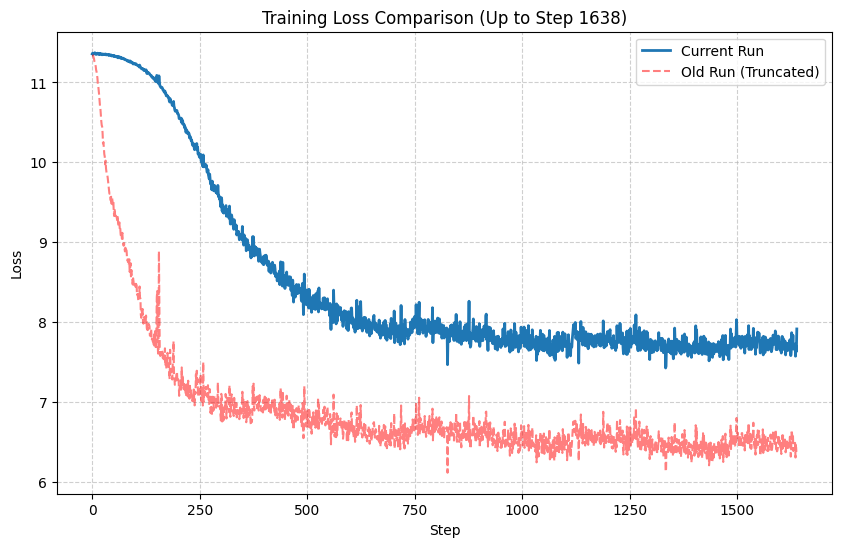

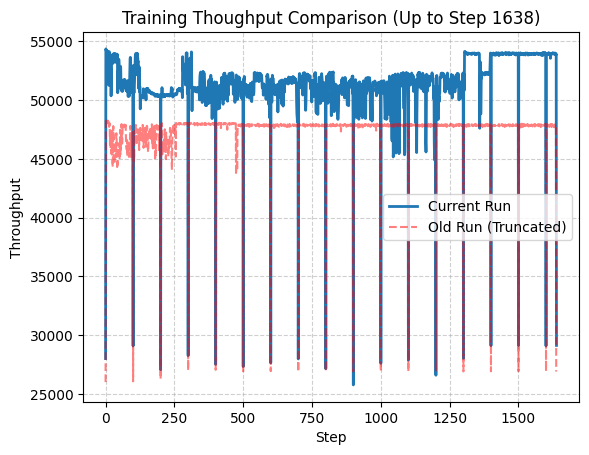

Avg. Throughput new: 51407.67780629286
Min Train Loss new: 7.4251
Min Val Loss new: 7.7384
Avg. Time new: 1281.4281829560705
Avg. Data Time new: 0.2887157730323368
Avg. Forward Time new: 428.5799432946919
Avg. Loss Time new: 40.30096185173886
Avg. Backward Time new: 754.4805463868213
Avg. clip_grad Time new: 34.18998582489323
Avg. Optimizer Time new: 11.331701476510068
Avg. Tok_Emb Time new: 4.072365159243441
Avg. Pos_Emb Time new: 0.18337747406955462
Avg. Mlp Time new: 179.0799286815131
Avg. Ln_f Time new: 1.4918128224527154
Avg. LM Head Time new: 252.5327335558267

Avg. Throughput old: 47463.302950357145
Min Train Loss old: 6.113817
Min Val Loss old: 6.49342
Avg. Time old: 1386.1042561056167
Avg. Data Time old: 0.15108231501831504
Avg. Forward Time old: 387.8982663705738
Avg. Loss Time old: 40.24801506166056
Avg. Backward Time old: 906.5516058504274
Avg. clip_grad Time old: 37.375924068376065
Avg. Optimizer Time old: 1.8789724444444444
Avg. Tok_Emb Time old: 4.028169748473748
Avg. Po

In [143]:
#after addmm's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log6.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log16.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

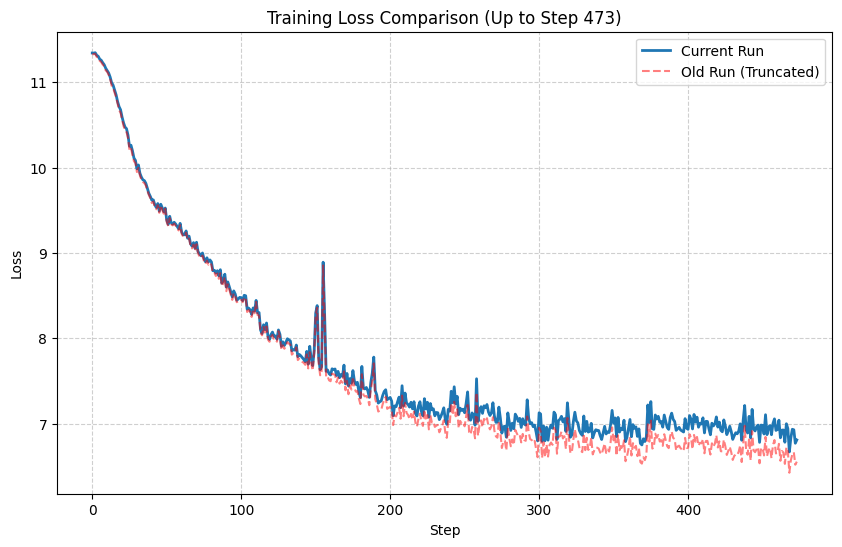

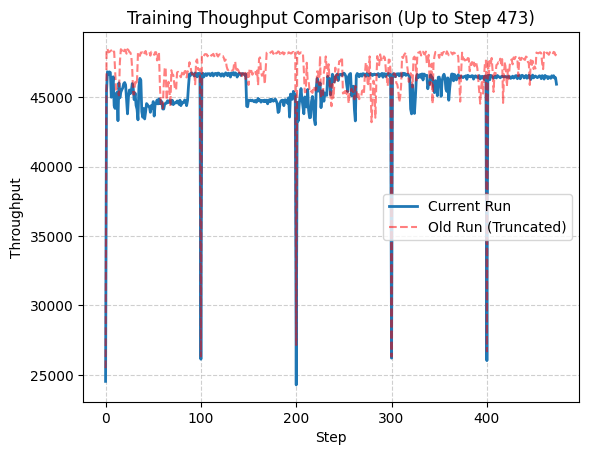

Avg. Throughput new: 45609.36508019831
Min Train Loss new: 6.668142
Min Val Loss new: 6.964633
Avg. Time new: 1442.908572683544
Avg. Data Time new: 0.22033275949367087
Avg. Forward Time new: 405.9214389789029
Avg. Loss Time new: 40.29493733755274
Avg. Backward Time new: 930.6156272194092
Avg. clip_grad Time new: 37.3689539556962
Avg. Optimizer Time new: 16.290601217299578
Avg. Tok_Emb Time new: 4.064721485232067
Avg. Pos_Emb Time new: 0.18443922362869197
Avg. Mlp Time new: 157.09870866033756
Avg. Ln_f Time new: 1.4864676455696202
Avg. LM Head Time new: 251.89815133755272

Avg. Throughput old: 46928.7944410443
Min Train Loss old: 6.424323
Min Val Loss old: 6.73404
Avg. Time old: 1402.3210240590718
Avg. Data Time old: 0.1689587848101266
Avg. Forward Time old: 387.22383551898736
Avg. Loss Time old: 40.30547146624473
Avg. Backward Time old: 923.7170037974684
Avg. clip_grad Time old: 37.207561044303795
Avg. Optimizer Time old: 1.88243976371308
Avg. Tok_Emb Time old: 0.9254231223628693
Avg. 

In [183]:
#after addmm's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log2.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log20.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

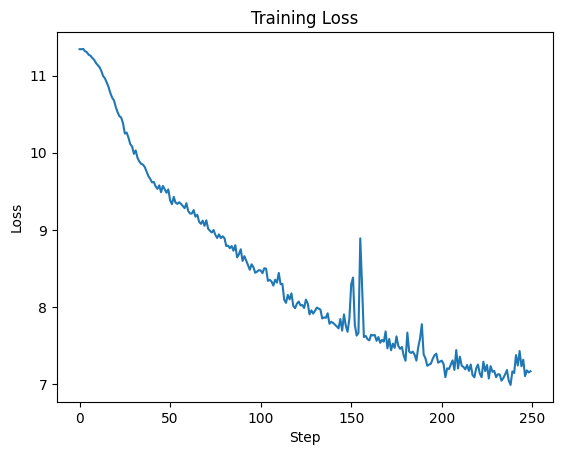

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log20.csv')

plt.plot(df['step'][:250].to_numpy(), df['loss'][:250].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

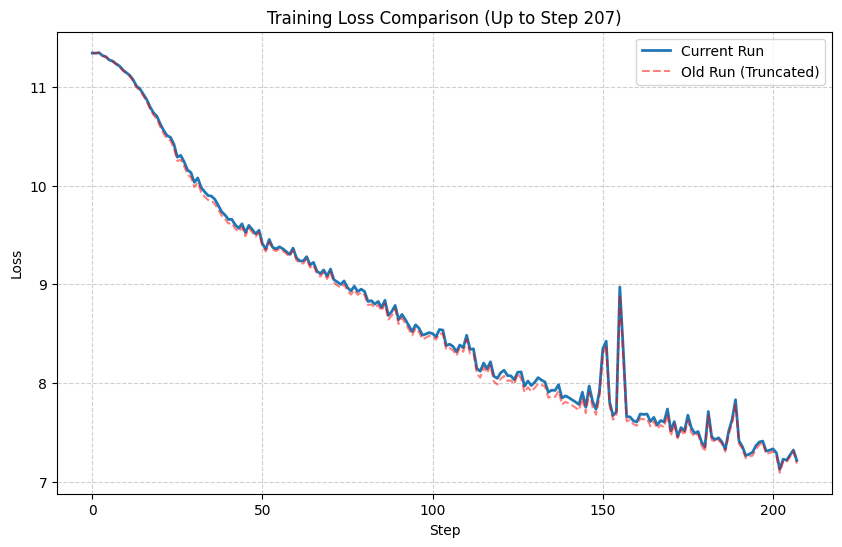

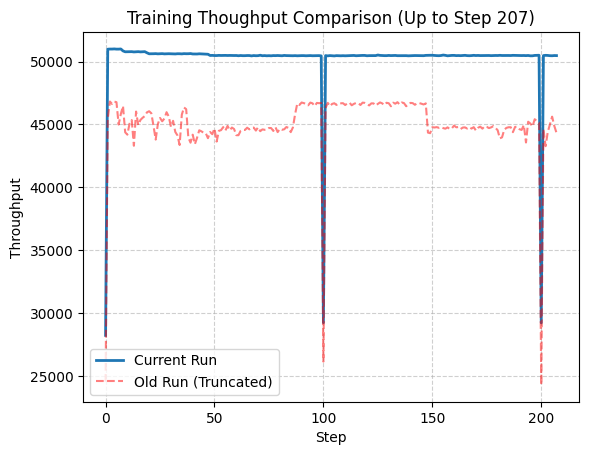

Avg. Throughput new: 50226.869560379804
Min Train Loss new: 7.126728
Min Val Loss new: 7.391259
Avg. Time new: 1310.7699444182692
Avg. Data Time new: 0.22297030769230772
Avg. Forward Time new: 336.76123286057697
Avg. Loss Time new: 40.26434841826923
Avg. Backward Time new: 863.1948123173077
Avg. clip_grad Time new: 40.039225100961545
Avg. Optimizer Time new: 16.09670922596154
Avg. Tok_Emb Time new: 4.150022615384615
Avg. Pos_Emb Time new: 0.17119815384615383
Avg. Mlp Time new: 89.62014097596155
Avg. Ln_f Time new: 1.4743532307692306
Avg. LM Head Time new: 251.72819420192306

Avg. Throughput old: 45040.451541206734
Min Train Loss old: 7.092654
Min Val Loss old: 7.360771
Avg. Time old: 1463.3472407211536
Avg. Data Time old: 0.22232107692307693
Avg. Forward Time old: 408.5613296778846
Avg. Loss Time old: 40.354823120192314
Avg. Backward Time old: 943.7811033942307
Avg. clip_grad Time old: 37.271857749999995
Avg. Optimizer Time old: 16.26573939423077
Avg. Tok_Emb Time old: 4.10697399999999

In [647]:
#after addmm's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log20.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log22.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

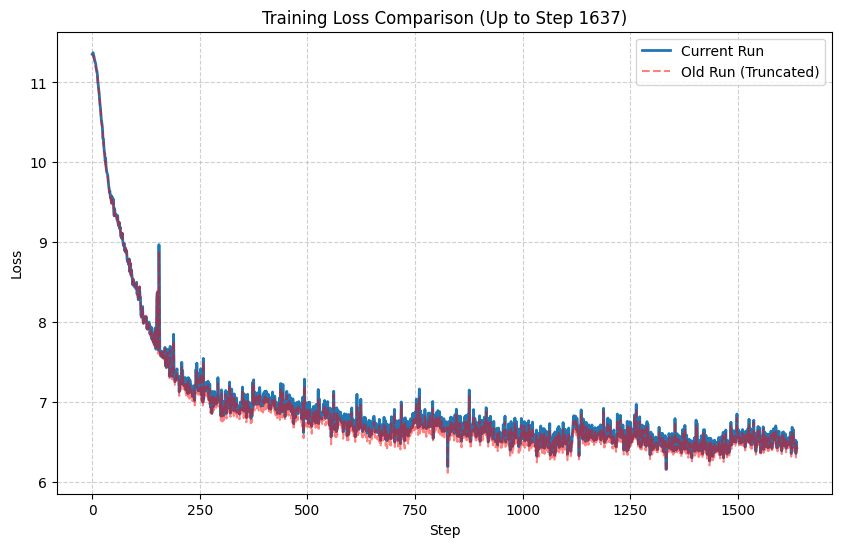

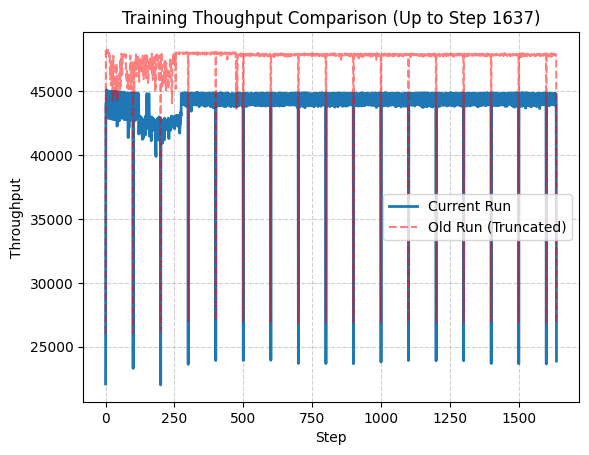

Avg. Throughput new: 44093.77470803602
Min Train Loss new: 6.156147
Min Val Loss new: 6.532338
Avg. Time new: 1493.4248910689864
Avg. Data Time new: 0.23406833699633703
Avg. Forward Time new: 474.7091581617826
Avg. Loss Time new: 40.26448635653236
Avg. Backward Time new: 911.4663074450549
Avg. clip_grad Time new: 37.23005814285714
Avg. Optimizer Time new: 14.986944566544567
Avg. Tok_Emb Time new: 4.071250012210013
Avg. Pos_Emb Time new: 0.18226774114774116
Avg. Mlp Time new: 227.82591378205126
Avg. Ln_f Time new: 1.486104791208791
Avg. LM Head Time new: 252.23846015873016

Avg. Throughput old: 47463.302950357145
Min Train Loss old: 6.113817
Min Val Loss old: 6.492063
Avg. Time old: 1386.1042561056167
Avg. Data Time old: 0.15108231501831504
Avg. Forward Time old: 387.8982663705738
Avg. Loss Time old: 40.24801506166056
Avg. Backward Time old: 906.5516058504274
Avg. clip_grad Time old: 37.375924068376065
Avg. Optimizer Time old: 1.8789724444444444
Avg. Tok_Emb Time old: 4.028169748473748


In [ ]:
#after backward hook method
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log6.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log1.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

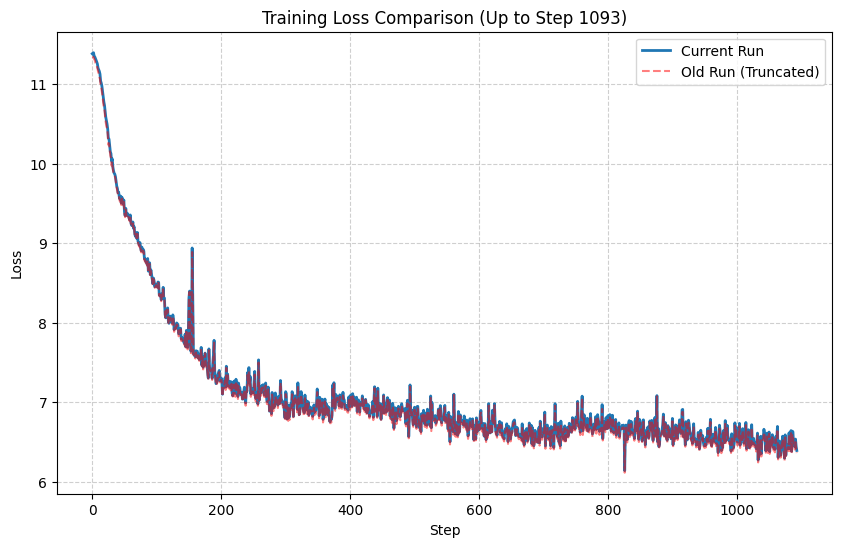

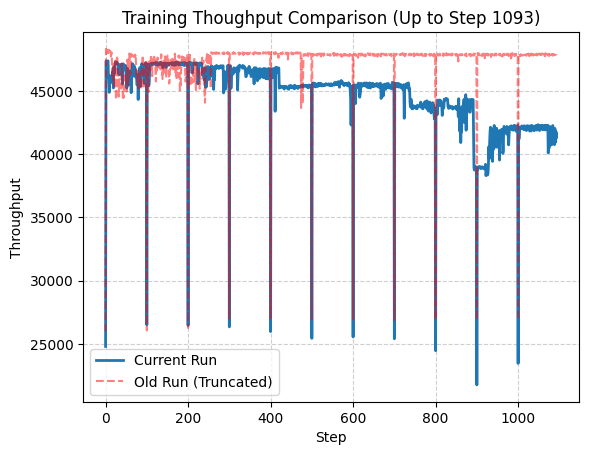

Avg. Throughput new: 44677.88746263802
Min Train Loss new: 6.139913
Min Val Loss new: 6.612314
Avg. Time new: 1475.3160389277878
Avg. Data Time new: 0.24493999268738575
Avg. Forward Time new: 407.2220045621572
Avg. Loss Time new: 40.313885838208414
Avg. Backward Time new: 963.3032950603291
Avg. clip_grad Time new: 37.38959051645338
Avg. Optimizer Time new: 15.001799897623398
Avg. Tok_Emb Time new: 4.062651407678245
Avg. Pos_Emb Time new: 0.18288400731261426
Avg. Mlp Time new: 158.11556159414988
Avg. Ln_f Time new: 1.4849222376599633
Avg. LM Head Time new: 251.84207940585014

Avg. Throughput old: 47403.88974348537
Min Train Loss old: 6.113817
Min Val Loss old: 6.579465
Avg. Time old: 1387.5196669488116
Avg. Data Time old: 0.1511006946983547
Avg. Forward Time old: 388.47118607129795
Avg. Loss Time old: 40.25232442504571
Avg. Backward Time old: 908.3658206270567
Avg. clip_grad Time old: 37.36570237111517
Avg. Optimizer Time old: 1.8793086069469835
Avg. Tok_Emb Time old: 4.019253791590493


In [660]:
#without  hook method
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log6.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log5.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Current Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Run (Truncated)', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

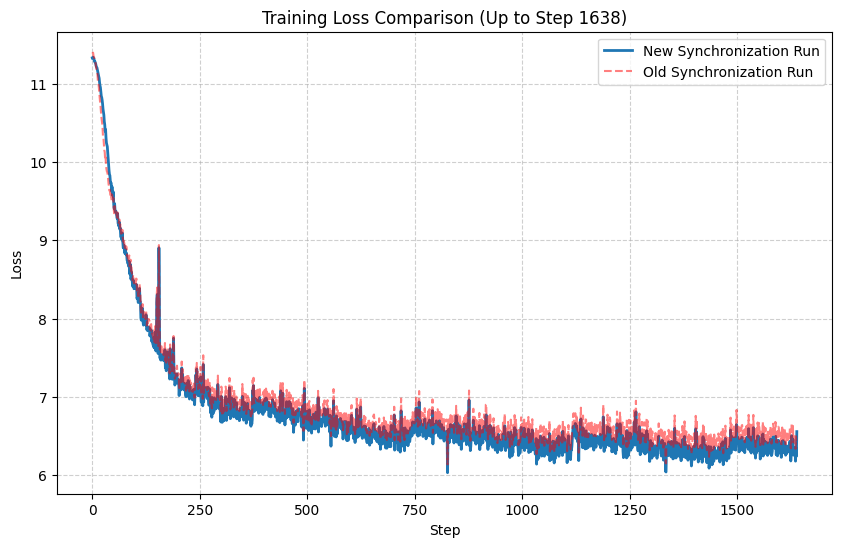

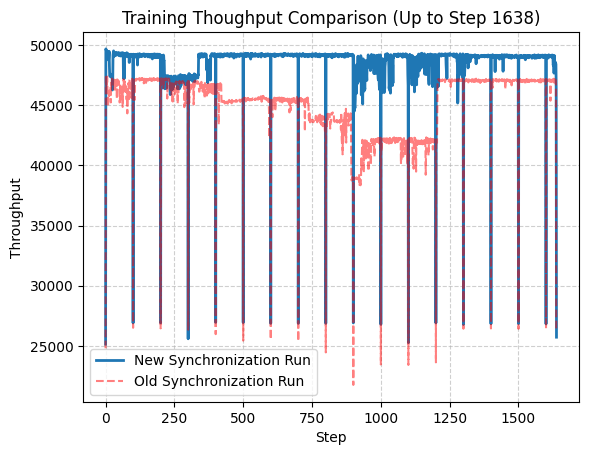

Max. Throughput new: 49671.723452
Avg. Throughput new: 48519.54031831788
Min Train Loss new: 6.03402
Min Val Loss new: 6.359128
Avg. Time new: 1356.673410438072
Avg. Data Time new: 0.5477284978645516
Avg. Forward Time new: 409.7946456705308
Avg. Loss Time new: 40.4699595899939
Avg. Backward Time new: 839.0408482190359
Avg. clip_grad Time new: 37.54055733007932
Avg. Optimizer Time new: 16.319473806589386
Avg. Tok_Emb Time new: 4.0806717071384995
Avg. Pos_Emb Time new: 0.20695095057962168
Avg. Mlp Time new: 160.4709187528981
Avg. Ln_f Time new: 1.5485406418547896
Avg. LM Head Time new: 252.48354041671755

Max. Throughput old: 47371.80019
Avg. Throughput old: 45023.3429722961
Min Train Loss old: 6.139913
Min Val Loss old: 6.523797
Avg. Time old: 1464.6621550586078
Avg. Data Time old: 0.2466313846153846
Avg. Forward Time old: 405.0142562564102
Avg. Loss Time old: 40.302955873626374
Avg. Backward Time old: 953.9005313131868
Avg. clip_grad Time old: 37.39075654029304
Avg. Optimizer Time old:

In [674]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log5.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='New Synchronization Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Synchronization Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='New Synchronization Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Synchronization Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

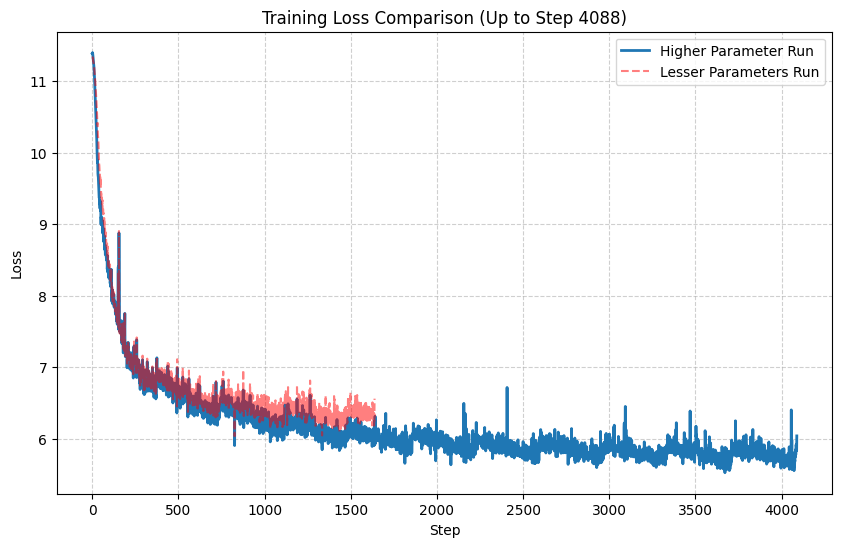

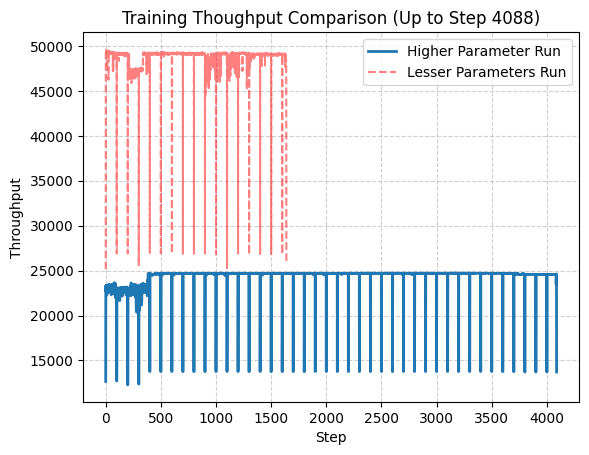

Max. Throughput new: 24719.281762
Avg. Throughput new: 24395.16696371142
Min Train Loss new: 5.522089
Min Val Loss new: 5.800086
Avg. Time new: 2697.635412601125
Avg. Data Time new: 0.2696706363414038
Avg. Forward Time new: 818.3153947860112
Avg. Loss Time new: 40.25267749425288
Avg. Backward Time new: 1679.723141935192
Avg. clip_grad Time new: 93.29320960601615
Avg. Optimizer Time new: 43.549496455123496
Avg. Tok_Emb Time new: 9.929930831010026
Avg. Pos_Emb Time new: 0.3143295045243336
Avg. Mlp Time new: 310.52067594693074
Avg. Ln_f Time new: 2.173773828319882
Avg. LM Head Time new: 446.5450913140132

Max. Throughput old: 49671.723452
Avg. Throughput old: 48519.54031831788
Min Train Loss old: 6.03402
Min Val Loss old: 6.359332
Avg. Time old: 1356.673410438072
Avg. Data Time old: 0.5477284978645516
Avg. Forward Time old: 409.7946456705308
Avg. Loss Time old: 40.4699595899939
Avg. Backward Time old: 839.0408482190359
Avg. clip_grad Time old: 37.54055733007932
Avg. Optimizer Time old: 16

In [44]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log12.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Higher Parameter Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Lesser Parameters Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Higher Parameter Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Lesser Parameters Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())